In [1]:
from gensim.models import FastText
model = FastText.load_fasttext_format("./model/fasttext.bin")

In [2]:
model.wv.most_similar("자바")

[('스크립트', 0.7857826948165894),
 ('Java', 0.7794339656829834),
 ('파이썬', 0.7776365280151367),
 ('자이썬', 0.7657759189605713),
 ('자바빈즈', 0.7467547059059143),
 ('자바기', 0.7453539371490479),
 ('JSP', 0.7429543137550354),
 ('프레임워크', 0.7426520586013794),
 ('JavaEE', 0.7413456439971924),
 ('스트럿츠', 0.7364211082458496)]

In [3]:
model.wv.doesnt_match(['많다', '넓다', '아늑하다', '쾌적하다', '좋다'])

'많다'

In [6]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

path_gothic = "C:/WINDOWS/FONTS/NanumBarunGothic.ttf"
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [7]:
vocab = list(model.wv.vocab)
X = model[vocab[0:1000]]

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X) 

In [8]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab[0:1000], columns=["x", "y", "z"])

In [9]:
df.head()

,x,y,z
1,-70.060562,73.116936,20.134544
.,-10.515092,69.269409,10.959837
0,-13.573504,42.049057,35.100582
2,42.613998,58.663521,16.931107
의,-8.411603,-27.637705,-51.668743


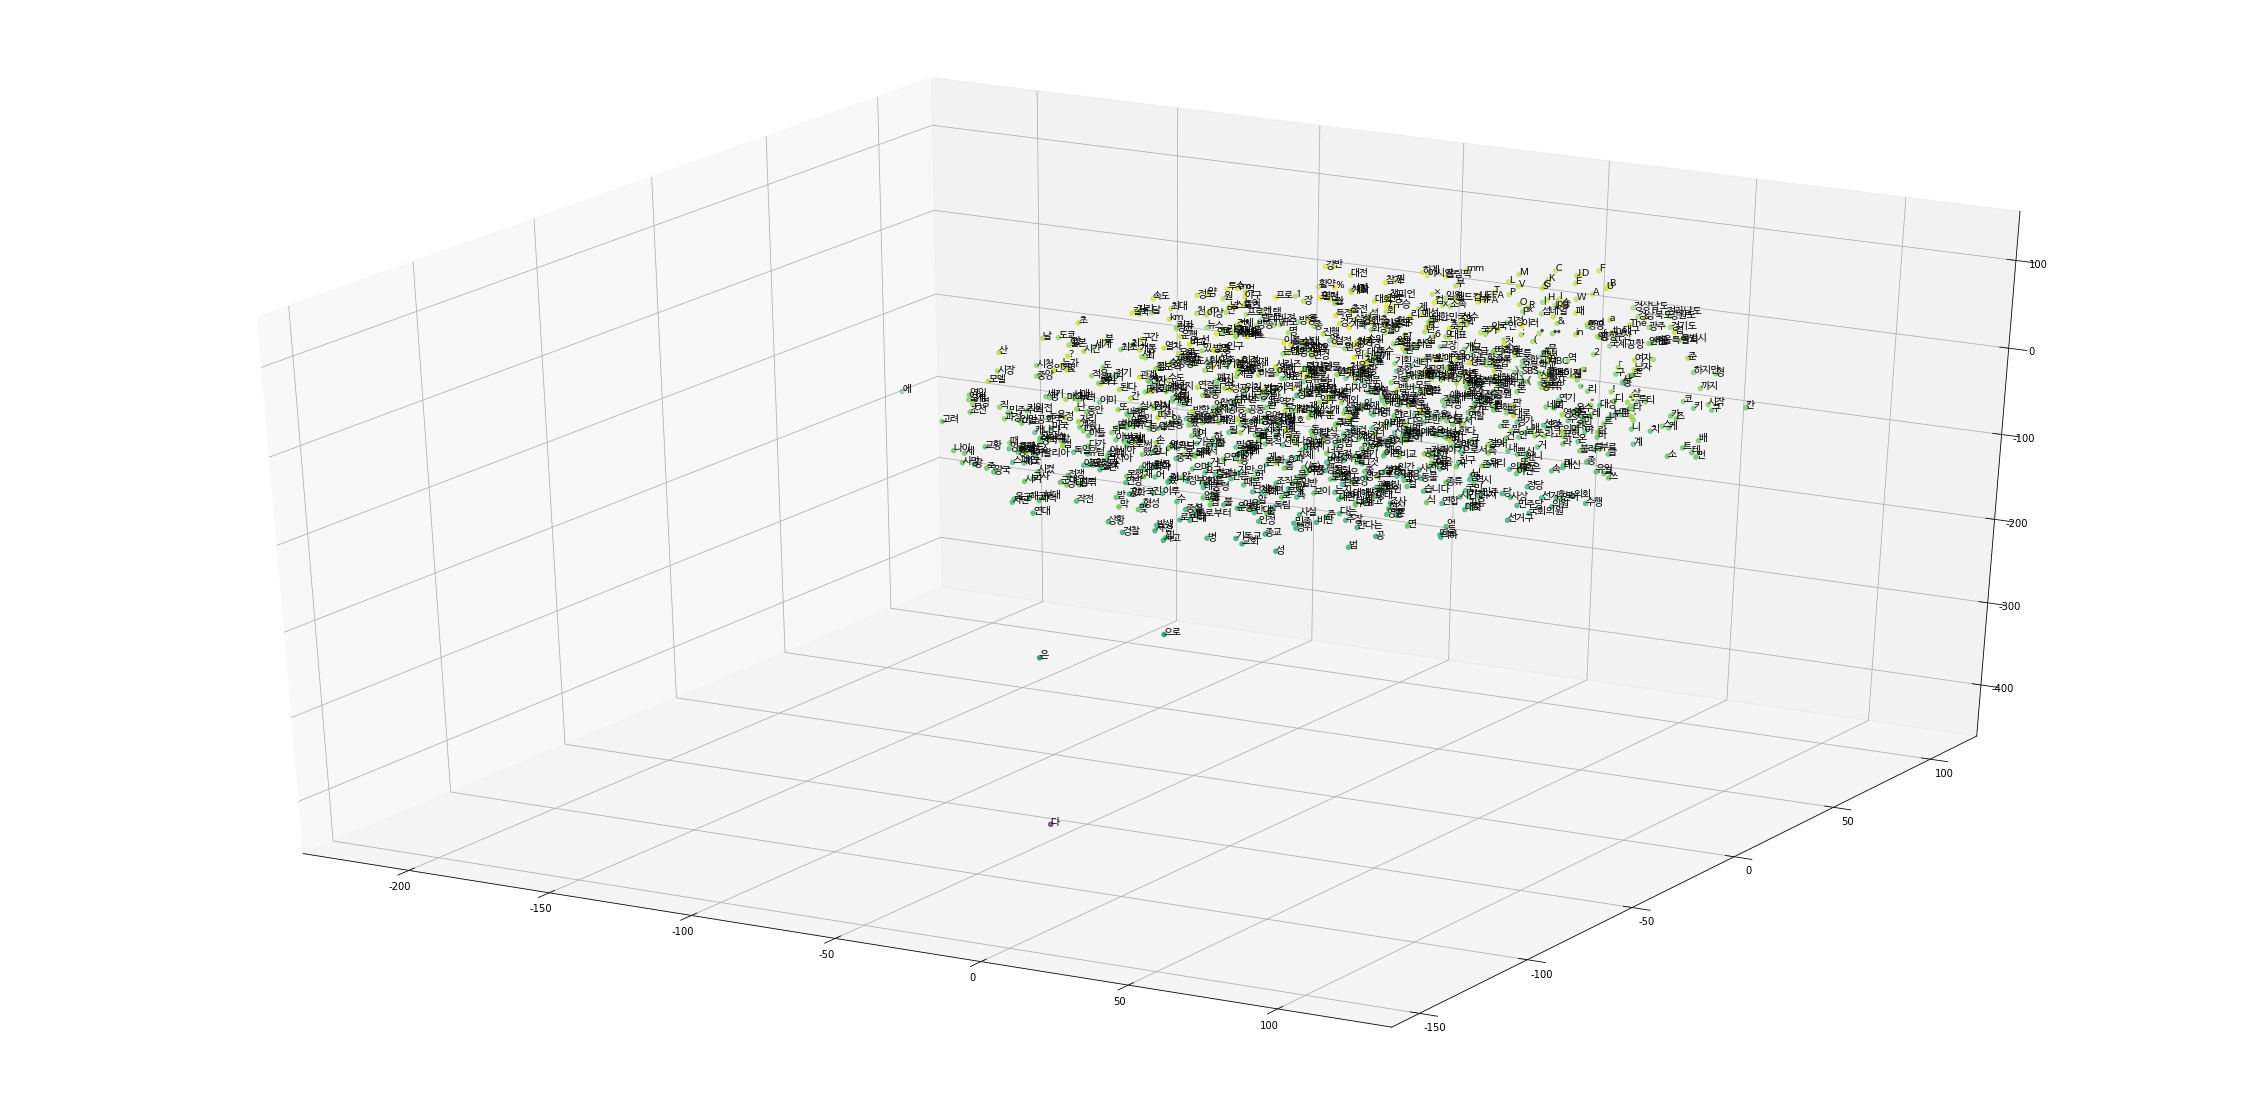

In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20, 20)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(df["x"], df["y"], df["z"], c=df["z"])

for word, pos in list(df.iterrows()):
    ax.text(pos[0], pos[1], pos[2], word, fontsize=0.1, fontproperties=prop)
plt.show()

In [11]:
from konlpy.tag import Okt
okt = Okt()
review = "생각보다 사람들도 많았고 넓어서 놀랐어용! 외관에서부터 풍기는 아늑한분위기와 딱 안성맞춤의 인테리어로 쾌적하고 좋더라구요~"
posed_review = okt.pos(review)

In [12]:
posed_review

[('생각', 'Noun'),
 ('보다', 'Josa'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('도', 'Josa'),
 ('많았고', 'Adjective'),
 ('넓어서', 'Adjective'),
 ('놀랐어용', 'Verb'),
 ('!', 'Punctuation'),
 ('외관', 'Noun'),
 ('에서부터', 'Josa'),
 ('풍기는', 'Verb'),
 ('아늑한', 'Adjective'),
 ('분위기', 'Noun'),
 ('와', 'Josa'),
 ('딱', 'Adverb'),
 ('안성맞춤', 'Noun'),
 ('의', 'Josa'),
 ('인테리어', 'Noun'),
 ('로', 'Josa'),
 ('쾌적하고', 'Adjective'),
 ('좋더라구요', 'Adjective'),
 ('~', 'Punctuation')]

In [13]:
okt.pos("가성비 최고")

[('가성', 'Noun'), ('비', 'Noun'), ('최고', 'Noun')]

In [14]:
posed_text = okt.pos("점심특선 가성비짱임 진짜 천원올려도 먹을곳임 초밥도 엄청 맛있음 그냥 회도 맛있음  단 그래서 손님 많아서 많이 기다려야함 요즘 사람너무 많아서 회도 미지근하고 치우는데 오래걸리고 처음에 맛이 안느껴짐ㅜㅜ 사람을 더 고용해야할듯 아무한테도 안가르쳐줄걸ㅜㅜ", stem=True)

In [15]:
adj_text = [i[0] for i in posed_text if i[1] == 'Adjective']

In [16]:
adj_text

['맛있다', '맛있다', '많다', '야하다', '많다', '미지근하다']

In [17]:
model.similar_by_word("많다")

[('종식', 0.3183608651161194),
 ('허구연', 0.3140856921672821),
 ('아벨리노', 0.3127707242965698),
 ('빌라노바', 0.3107663094997406),
 ('–)', 0.307956337928772),
 ('이탈', 0.30503517389297485),
 ('해양학', 0.3030852675437927),
 ('지질학자', 0.30263376235961914),
 ('공학자', 0.30202943086624146),
 ('롬바르디', 0.3014619052410126)]

In [18]:
model.wv.distance("많다", "맛있다")

1.0968777909874916

In [19]:
okt.pos("많다")

[('많다', 'Adjective')]

In [22]:
from konlpy.tag import Kkma
kkma = Kkma()

In [23]:
kkma.pos("많아서")

[('많', 'VA'), ('아서', 'ECD')]

In [25]:
kkma.pos("아늑하고 좋아요")

[('아늑', 'XR'), ('하', 'XSA'), ('고', 'ECE'), ('좋', 'VA'), ('아요', 'EFN')]